### Тема курсовой работы: Сравнение ранней остановки и L2-регуляризации для предотвращения переобучения в задаче классификации веб-сайтов (Phishing Websites).
#### Студент: Иван Пяткин. УПАСбд-42
#### Данный датасет содержит файл расширения .arff, который после проверок содержит итоговый результат (Result). Если 1 - сайт чистый, если -1 - сайт фишинговый. Итоговый результат формируется из наших признаков, которые проверяют домен, содержит ли он запрещенные знаки или имеет странный вид и т.д.

1. ЗАГРУЗКА И ОБРАБОТКА ДАННЫХ
Датасет загружен
  Размер: 11055 строк, 30 признаков
Анализ данных:


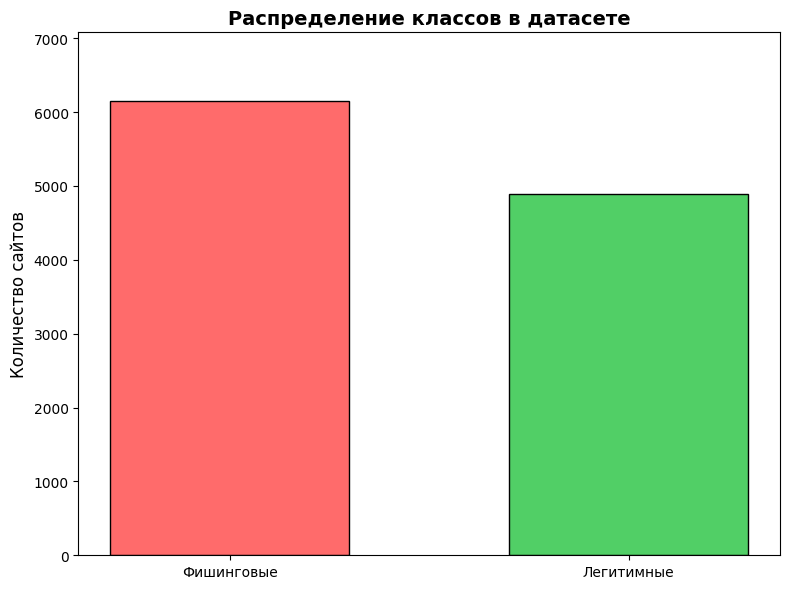

2. ПОДГОТОВКА ДАННЫХ
Размер обучающей выборки: (8844, 30)
Размер тестовой выборки: (2211, 30)
3. БАЗОВАЯ МОДЕЛЬ БЕЗ РЕГУЛЯРИЗАЦИИ
Точность на обучающей выборке: 0.9884
Точность на тестовой выборке: 0.9711
Разница (переобучение): 0.0173
4. МОДЕЛЬ L2-РЕГУЛЯРИЗАЦИЕЙ
Подбор параметра alpha для L2-регуляризации
  alpha=0.0001: средняя точность = 0.9590
  alpha=0.001: средняя точность = 0.9591
  alpha=0.01: средняя точность = 0.9599
  alpha=0.1: средняя точность = 0.9609
  alpha=1.0: средняя точность = 0.9553

 Лучший параметр: alpha = 0.1
Точность на обучающей выборке: 0.9873
Точность на тестовой выборке: 0.9683
Разница (переобучение): 0.0190
5. МОДЕЛЬ РАННЕЙ ОСТАНОВКИ
Количество выполненных итераций: 46
Точность на обучающей выборке: 0.9699
Точность на тестовой выборке: 0.9643
Разница (переобучение): 0.0057
6. СРАВНИТЕЛЬНЫЙ АНАЛИЗ МЕТОДОВ
Сводная таблица результатов:
              Метод  Точность (обучение)  Точность (тест)  Разность  F1-score
Базовая(без регул.)             0.988354      

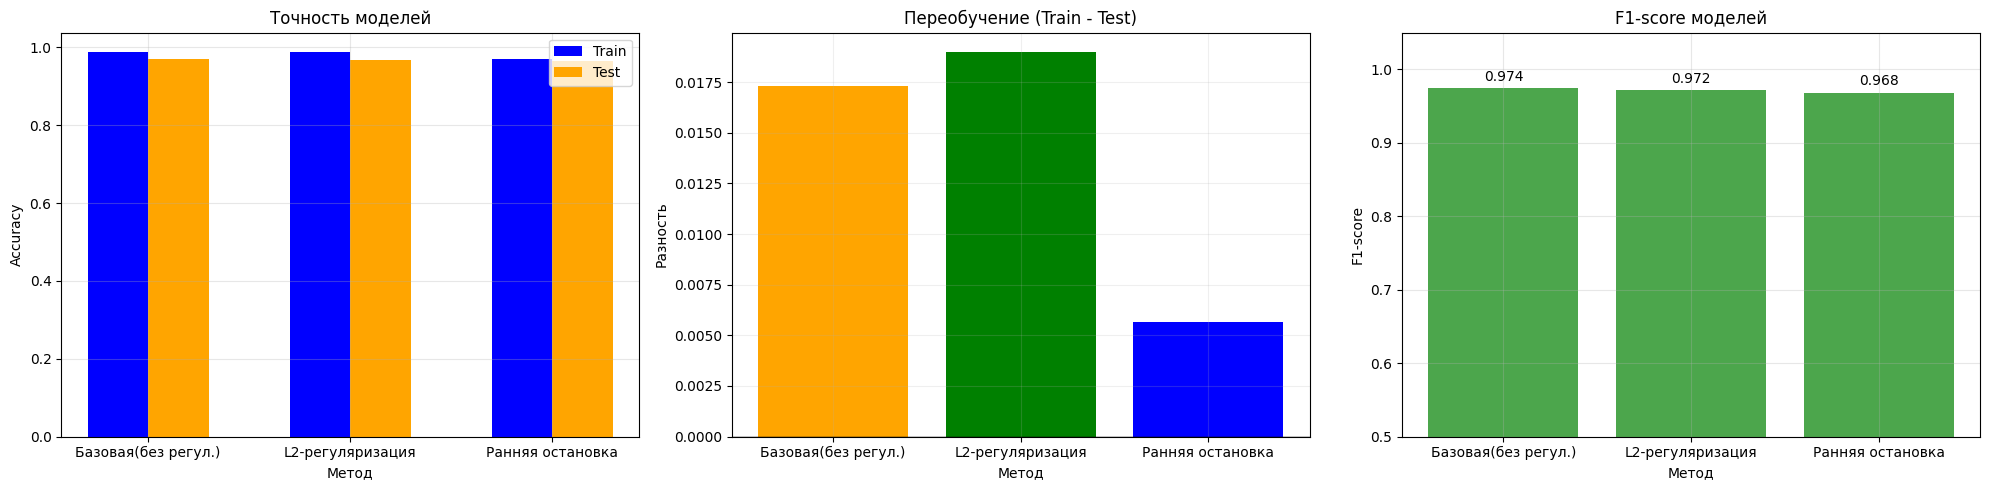

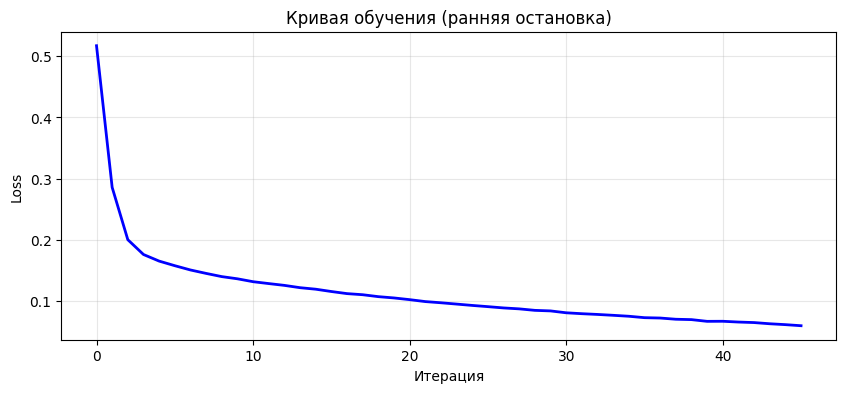

8. РЕЗУЛЬТАТЫ МОДЕЛЕЙ

Базовая:
  Precision: 0.9598
  Recall:    0.9894
  F1-score:  0.9744

L2:
  Precision: 0.9663
  Recall:    0.9773
  F1-score:  0.9717

Ранняя остановка:
  Precision: 0.9601
  Recall:    0.9764
  F1-score:  0.9682


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

print("1. ЗАГРУЗКА И ОБРАБОТКА ДАННЫХ")

data, meta = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data) 
print(f"Датасет загружен")
print(f"  Размер: {df.shape[0]} строк, {df.shape[1]-1} признаков")

print("Анализ данных:")
plt.figure(figsize=(8, 6))
class_counts = df['Result'].value_counts()
colors = ['#ff6b6b', '#51cf66']
labels = ['Фишинговые', 'Легитимные']

bars = plt.bar(labels, class_counts.values, color=colors, width=0.6, edgecolor='black')

plt.title('Распределение классов в датасете', fontsize=14, fontweight='bold')
plt.ylabel('Количество сайтов', fontsize=12)
plt.ylim(0, max(class_counts.values) * 1.15)
plt.tight_layout()
plt.show()

print("2. ПОДГОТОВКА ДАННЫХ")
X = df.drop('Result', axis=1)
y = df['Result']

y = pd.to_numeric(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Размер обучающей выборки: {X_train_scaled.shape}")
print(f"Размер тестовой выборки: {X_test_scaled.shape}")

print("3. БАЗОВАЯ МОДЕЛЬ БЕЗ РЕГУЛЯРИЗАЦИИ")
base_model = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=False
)

base_model.fit(X_train_scaled, y_train)

train_acc_base = accuracy_score(y_train, base_model.predict(X_train_scaled))
test_acc_base = accuracy_score(y_test, base_model.predict(X_test_scaled))

print(f"Точность на обучающей выборке: {train_acc_base:.4f}")
print(f"Точность на тестовой выборке: {test_acc_base:.4f}")
print(f"Разница (переобучение): {train_acc_base - test_acc_base:.4f}")

print("4. МОДЕЛЬ L2-РЕГУЛЯРИЗАЦИЕЙ")
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
best_alpha = alphas[0]
best_score = 0

print("Подбор параметра alpha для L2-регуляризации")
for alpha in alphas:
    model = MLPClassifier(
        hidden_layer_sizes=(50, 25),
        activation='relu',
        solver='adam',
        alpha=alpha,  
        max_iter=500,
        random_state=42,
        early_stopping=False
    )
    
    scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='accuracy')
    mean_score = scores.mean()
    
    print(f"  alpha={alpha}: средняя точность = {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

print(f"\n Лучший параметр: alpha = {best_alpha}")

l2_model = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    alpha=best_alpha,
    max_iter=500,
    random_state=42,
    early_stopping=False
)

l2_model.fit(X_train_scaled, y_train)

train_acc_l2 = accuracy_score(y_train, l2_model.predict(X_train_scaled))
test_acc_l2 = accuracy_score(y_test, l2_model.predict(X_test_scaled))

print(f"Точность на обучающей выборке: {train_acc_l2:.4f}")
print(f"Точность на тестовой выборке: {test_acc_l2:.4f}")
print(f"Разница (переобучение): {train_acc_l2 - test_acc_l2:.4f}")

print("5. МОДЕЛЬ РАННЕЙ ОСТАНОВКИ")
es_model = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,  
    random_state=42,
    early_stopping=True,  
    validation_fraction=0.2,  
    n_iter_no_change=10,  
)

es_model.fit(X_train_scaled, y_train)

train_acc_es = accuracy_score(y_train, es_model.predict(X_train_scaled))
test_acc_es = accuracy_score(y_test, es_model.predict(X_test_scaled))

print(f"Количество выполненных итераций: {es_model.n_iter_}")
print(f"Точность на обучающей выборке: {train_acc_es:.4f}")
print(f"Точность на тестовой выборке: {test_acc_es:.4f}")
print(f"Разница (переобучение): {train_acc_es - test_acc_es:.4f}")

print("6. СРАВНИТЕЛЬНЫЙ АНАЛИЗ МЕТОДОВ")
methods = ['Базовая(без регул.)', 'L2-регуляризация', 'Ранняя остановка']
train_accuracies = [train_acc_base, train_acc_l2, train_acc_es]
test_accuracies = [test_acc_base, test_acc_l2, test_acc_es]
overfitting = [train_acc_base - test_acc_base, 
               train_acc_l2 - test_acc_l2, 
               train_acc_es - test_acc_es]

results_df = pd.DataFrame({
    'Метод': methods,
    'Точность (обучение)': train_accuracies,
    'Точность (тест)': test_accuracies,
    'Разность': overfitting,
    'F1-score': [
        f1_score(y_test, base_model.predict(X_test_scaled)),
        f1_score(y_test, l2_model.predict(X_test_scaled)),
        f1_score(y_test, es_model.predict(X_test_scaled))
    ]
})

print("Сводная таблица результатов:")
print(results_df.to_string(index=False))

best_idx = np.argmax(test_accuracies)
print(f"\n ЛУЧШИЙ МЕТОД: {methods[best_idx]}")
print(f"Точность на тестовой выборке: {test_accuracies[best_idx]:.4f}")

print("7. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
x = range(len(methods))
plt.bar(x, train_accuracies, width=0.3, label='Train', color='blue')
plt.bar([i+0.3 for i in x], test_accuracies, width=0.3, label='Test', color='orange')
plt.title('Точность моделей')
plt.xlabel('Метод')
plt.ylabel('Accuracy')
plt.xticks([i+0.15 for i in x], methods)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.bar(methods, overfitting, color=['orange', 'green', 'blue'])
plt.title('Переобучение (Train - Test)')
plt.xlabel('Метод')
plt.ylabel('Разность')
plt.axhline(y=0, color='black', linewidth=1)
plt.grid(True, alpha=0.2)

plt.subplot(1, 3, 3)
f1_scores = results_df['F1-score']
plt.bar(methods, f1_scores, color='green', alpha=0.7, label='F1-score')
plt.title('F1-score моделей')
plt.xlabel('Метод')
plt.ylabel('F1-score')
plt.ylim(0.5, 1.05)
plt.grid(True, alpha=0.3)

for i in range(len(methods)):
    plt.text(i, f1_scores[i]+0.01, f'{f1_scores[i]:.3f}', ha='center')

plt.tight_layout()
plt.show()

if hasattr(es_model, 'loss_curve_'):
    plt.figure(figsize=(10, 4))
    plt.plot(es_model.loss_curve_, 'b-', linewidth=2)
    plt.title('Кривая обучения (ранняя остановка)')
    plt.xlabel('Итерация')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)
    plt.show()

print("8. РЕЗУЛЬТАТЫ МОДЕЛЕЙ")

for name, model in zip(['Базовая', 'L2', 'Ранняя остановка'], 
                       [base_model, l2_model, es_model]):
    y_pred = model.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{name}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")